In [0]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.utils import resample
import time

In [0]:
import sys
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from IPython.display import display, Image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns
import glob

!pip install python-mnist


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls /content/gdrive
%cd '/content/gdrive/My Drive/DSF_proj/'
!ls

'My Drive'
/content/gdrive/My Drive/DSF_proj
 BreastCancer.ipynb	       GoogleNews-vectors-negative300.bin
 breast_cancer_wisconson.csv   MNIST_digit
'Copy of dsf_dim_red.ipynb'    Proposal.gdoc
 dsf_dim_red.ipynb	      'Time Complexity.ipynb'


In [0]:
from mnist import MNIST
mndata = MNIST('MNIST_digit')

In [0]:
trn, trnLabels = mndata.load_training()
tstImg, tstLabels = mndata.load_testing()

In [0]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
st = time.time()
tsneRes = tsne.fit_transform(trn[:5000])
timeTSNE = time.time() - st



In [0]:
print(timeTSNE)
X = trn[:5000]

99.68591666221619


In [0]:
from sklearn.decomposition import PCA
st = time.time()
pca = PCA(n_components= 20)
pcaRes = pca.fit_transform(X)
tsne = TSNE(n_components=2)
tpRes = tsne.fit_transform(pcaRes)
timeTP = time.time() - st


In [0]:
from umap import UMAP
st = time.time()
umap = UMAP(random_state=42)
umapRes = umap.fit_transform(X)
timeUMAP = time.time() - st


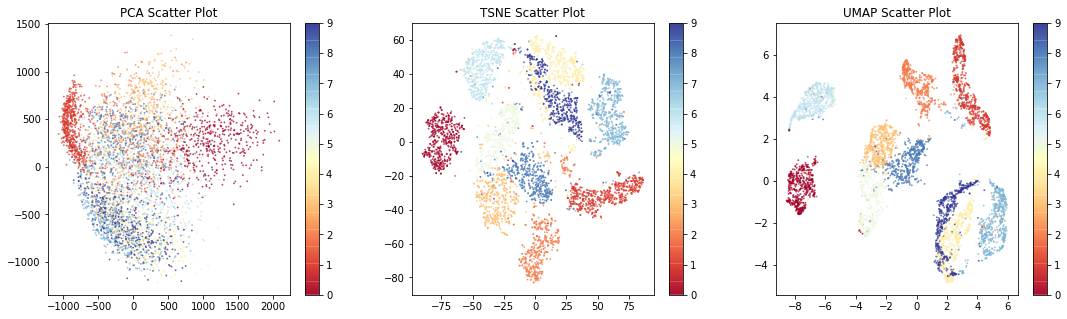

In [0]:
target = trnLabels[:5000]

plt.figure(figsize = (25,11))
plt.subplot(241)
plt.scatter(pcaRes[:,0],pcaRes[:,1],  c = target, cmap = 'RdYlBu', edgecolor = "None", alpha=0.75, s=3.3)
plt.colorbar()
plt.title('PCA Scatter Plot')

plt.subplot(242)
plt.scatter(tpRes[:,0],tpRes[:,1],  c = target, cmap = 'RdYlBu', edgecolor = "None", alpha=0.75, s=3.3)
plt.colorbar()
plt.title('TSNE Scatter Plot')

plt.subplot(243)
plt.scatter(umapRes[:,0], umapRes[:,1],  c = target, cmap = 'RdYlBu', edgecolor = "None", alpha=0.75, s=3.5)
plt.colorbar()
plt.title('UMAP Scatter Plot')
plt.show()

In [0]:
!pip install hdbscan

<class 'array.array'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


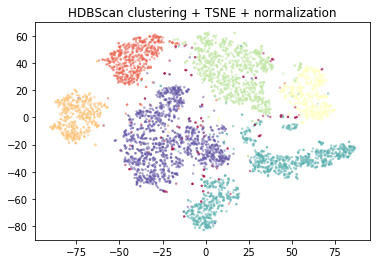

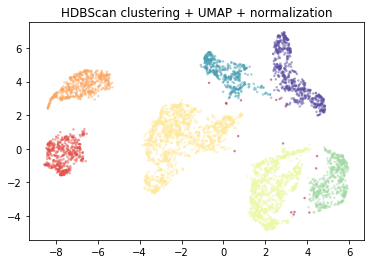

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [0]:
import hdbscan
print(type(target), type(hdb2), type(hdb3))
from sklearn.metrics.cluster import normalized_mutual_info_score
target = trnLabels[:5000]
hdb2 = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=400).fit_predict(tsneRes)
clustered = (hdb2 >= 0)
plt.scatter(tpRes[:, 0], tpRes[:, 1], c=hdb2, cmap='Spectral', edgecolor = "None", alpha=0.5, s=6);
scoreTSNE = normalized_mutual_info_score(target, hdb2)
plt.title("HDBScan clustering + TSNE + normalization")
plt.show()

hdb3 = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=400).fit_predict(umapRes)
clustered = (hdb3 >= 0)
plt.scatter(umapRes[:, 0], umapRes[:, 1], c=hdb3, cmap='Spectral', edgecolor = "None", alpha=0.5, s = 6);
# print(normalized_mutual_info_score(target, hdb3))
plt.title("HDBScan clustering + UMAP + normalization")
plt.show()
scoreUMAP = normalized_mutual_info_score(target, list(hdb3))

In [0]:
print(scoreTSNE, scoreUMAP)

0.7262660022503022 0.7750644390331407


In [0]:
timeTSNE

99.68591666221619

In [0]:
timeUMAP

17.938820600509644